In [3]:
pip install kaggle


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'D:\internship\language_detection\Language Detection.csv')

# View the first few rows
print(df.head())


                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [3]:
# Check for null values
print(df.isnull().sum())

# Check for data distribution
print(df['Language'].value_counts())

# Example of text and language
print(df.sample(5))


Text        0
Language    0
dtype: int64
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64
                                                   Text Language
9494  غيرت narcisa طرقها التي كافحت في البداية ولكن ...   Arabic
9256         ثلاثة إذا كنت تريد أن تسألك ماذا كنت تفعل.   Arabic
2117  அதிகமான கட்டுரைகளைக் கொண்ட மொழிப் பதிப்புக்களி...    Tamil
5317  bueno, solo puedes responder, no puedo quejarm...  Spanish
7351  L'apprendimento automatico viene impiegato in ...  Italian


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv(r'D:\internship\language_detection\Language Detection.csv')

# Check for null values
print(df.isnull().sum())

# Basic dataset information
print(df['Language'].value_counts())

# Custom stopwords list for multiple languages
custom_stopwords = {
    'english': ['the', 'is', 'in', 'and', 'to', 'of'],
    'french': ['le', 'la', 'les', 'un', 'une', 'et', 'de'],
    'spanish': ['el', 'la', 'los', 'y', 'de'],
    'portugeese': ['o', 'a', 'os', 'e', 'de'],
    'italian': ['il', 'lo', 'la', 'e', 'di'],
    'russian': ['и', 'в', 'на', 'с', 'по'],
    'german': ['der', 'die', 'das', 'und', 'zu'],
    'swedish': ['och', 'att', 'är', 'som', 'det'],
    'dutch': ['de', 'het', 'een', 'en', 'van'],
    'danish': ['og', 'at', 'er', 'det'],
    'greek': ['και', 'το', 'να', 'είναι'],
    # Add more languages as needed
}

# Function to remove stopwords using the custom list
def remove_stopwords(text, language):
    stop_words = custom_stopwords.get(language.lower(), [])
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply preprocessing to remove stopwords based on language
df['Text'] = df.apply(lambda row: remove_stopwords(row['Text'].lower(), row['Language']), axis=1)

# Define features (X) and labels (y)
X = df['Text']
y = df['Language']

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Evaluate Naive Bayes model
print("Naive Bayes Results:")
print(classification_report(y_test, nb_preds))
print(f"Accuracy: {accuracy_score(y_test, nb_preds)}")

# Evaluate SVM model
print("SVM Results:")
print(classification_report(y_test, svm_preds))
print(f"Accuracy: {accuracy_score(y_test, svm_preds)}")

# Function to predict language for new text input
def predict_language(text):
    text_preprocessed = remove_stopwords(text.lower(), 'english')  # Preprocess input text
    vectorized_text = vectorizer.transform([text_preprocessed])
    nb_prediction = nb_model.predict(vectorized_text)[0]
    svm_prediction = svm_model.predict(vectorized_text)[0]
    return {'Naive Bayes': nb_prediction, 'SVM': svm_prediction}

# Take user input for language detection
while True:
    new_text = input("Enter text to detect language (or type 'exit' to quit): ")
    if new_text.lower() == 'exit':
        break
    predicted_language = predict_language(new_text)
    print(f"Predicted language for '{new_text}': {predicted_language}")


Text        0
Language    0
dtype: int64
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64
Naive Bayes Results:
              precision    recall  f1-score   support

      Arabic       1.00      0.93      0.97       106
      Danish       0.99      0.92      0.95        73
       Dutch       0.99      0.95      0.97       111
     English       0.81      1.00      0.89       291
      French       0.99      0.97      0.98       219
      German       0.99      0.95      0.97        93
       Greek       1.00      0.90      0.95        68
       Hindi       1.00      0.70      0.82        10
     Italian       0.99      0.96      0.97       145
     Kannada       1.00      1.00      1.00  

In [16]:
import pickle

# Save the model to a file
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)



In [18]:
# Load the model from the file
with open(r'D:\internship\language_detection\server\src\models\model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open(r'D:\internship\language_detection\server\src\models\vectorizer.pkl', 'rb') as file:
    vectorizer1 = pickle.load(file)

# vectorizer1

In [19]:
custom_stopwords = {
    'english': ['the', 'is', 'in', 'and', 'to', 'of'],
    'french': ['le', 'la', 'les', 'un', 'une', 'et', 'de'],
    'spanish': ['el', 'la', 'los', 'y', 'de'],
    'portugeese': ['o', 'a', 'os', 'e', 'de'],
    'italian': ['il', 'lo', 'la', 'e', 'di'],
    'russian': ['и', 'в', 'на', 'с', 'по'],
    'german': ['der', 'die', 'das', 'und', 'zu'],
    'swedish': ['och', 'att', 'är', 'som', 'det'],
    'dutch': ['de', 'het', 'een', 'en', 'van'],
    'danish': ['og', 'at', 'er', 'det'],
    'greek': ['και', 'το', 'να', 'είναι'],
    # Add more languages as needed
}

def remove_stopwords(text, language):
    stop_words = custom_stopwords.get(language.lower(), [])
    return ' '.join([word for word in text.split() if word not in stop_words])

def predict_language(text):
    text_preprocessed = remove_stopwords(text.lower(), 'english')  # Preprocess input text
    vectorized_text = vectorizer1.transform([text_preprocessed])
    nb_prediction = loaded_model.predict(vectorized_text)[0]
    return {'Naive Bayes': nb_prediction}

predict_language('ثلاثة إذا كنت تريد أن تسألك ماذا كنت تفعل')

{'Naive Bayes': 'Arabic'}

<10337x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 98052 stored elements in Compressed Sparse Row format>

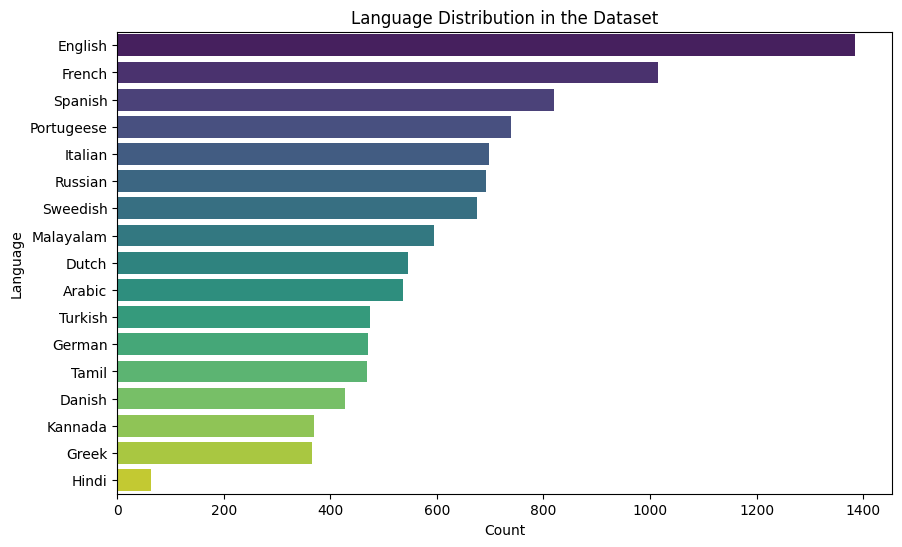

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot language distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Language'], order=df['Language'].value_counts().index, palette='viridis')
plt.title('Language Distribution in the Dataset')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


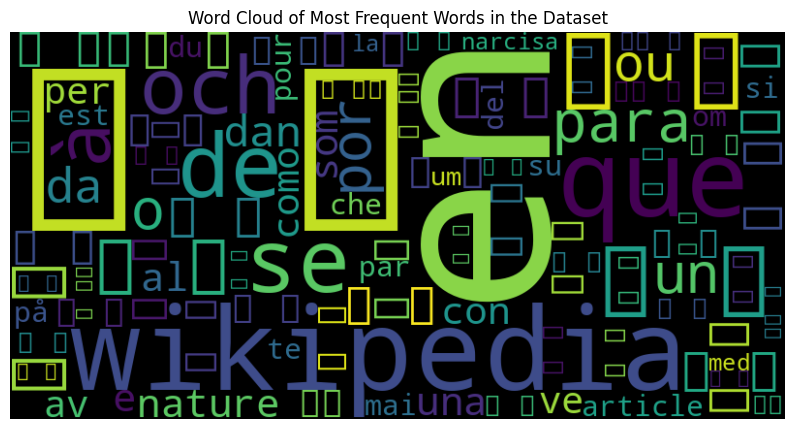

In [4]:
from wordcloud import WordCloud

# Generate a word cloud for the entire dataset
all_text = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in the Dataset')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


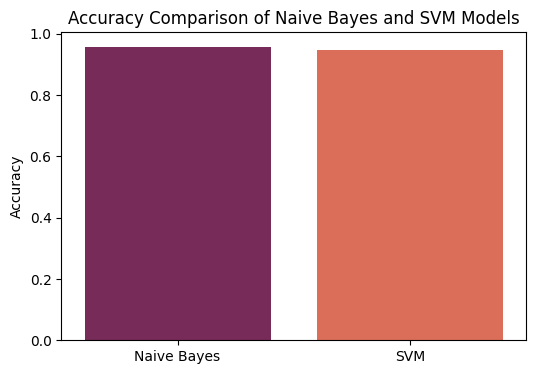

In [5]:
# Model accuracy values
nb_accuracy = accuracy_score(y_test, nb_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)

# Plotting accuracy comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Naive Bayes', 'SVM'], y=[nb_accuracy, svm_accuracy], palette='rocket')
plt.title('Accuracy Comparison of Naive Bayes and SVM Models')
plt.ylabel('Accuracy')
plt.show()


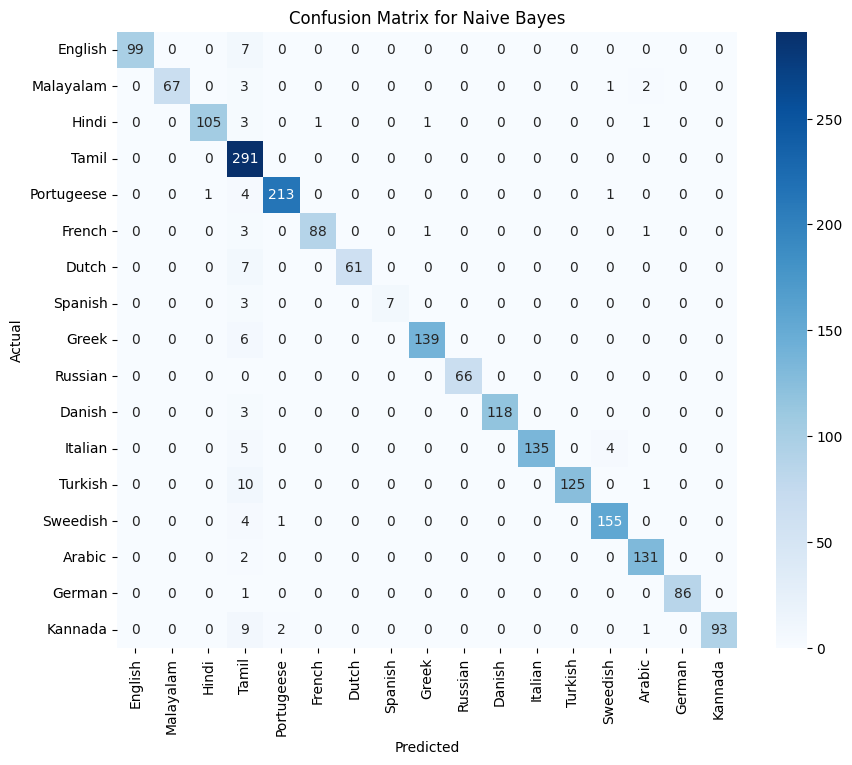

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix for Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['Language'].unique(), yticklabels=df['Language'].unique())
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


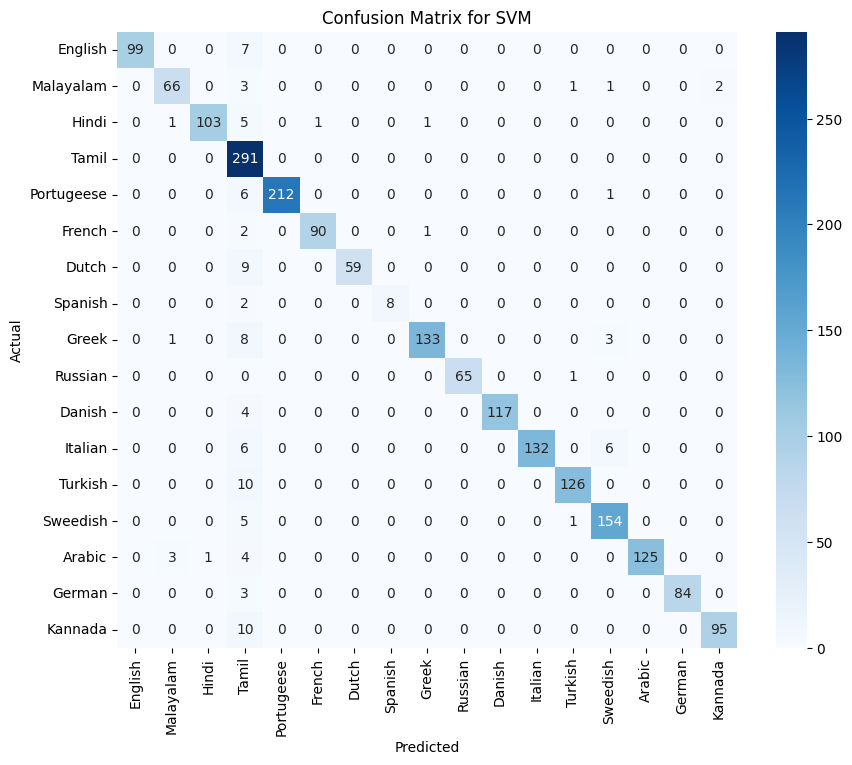

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix for SVM
nb_conf_matrix = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['Language'].unique(), yticklabels=df['Language'].unique())
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()